In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2

In [7]:
LOG_PATH = "detections_log_front_room_2.csv"  # Path ไปที่ log
FRAME_WIDTH = 1280
FRAME_HEIGHT = 720

In [8]:
def parse_xy(xy_str):
    try:
        xy = ast.literal_eval(str(xy_str))
        if isinstance(xy, (list, tuple)) and len(xy) == 2:
            cx = float(xy[0]) * FRAME_WIDTH
            cy = float(xy[1]) * FRAME_HEIGHT
            return cx, cy
    except:
        pass
    return None

In [9]:
# อ่าน CSV
df = pd.read_csv(LOG_PATH, on_bad_lines='skip')

# ดึงคอลัมน์ตำแหน่ง
xy_cols = [col for col in df.columns if "_xy" in col]


In [10]:
# รวมพิกัดทั้งหมด
points = []
for _, row in df.iterrows():
    for col in xy_cols:
        coords = parse_xy(row[col])
        if coords:
            points.append(coords)

points = np.array(points, dtype=float)
points = points[~np.isnan(points).any(axis=1)]

if len(points) < 2:
    raise ValueError(f"ต้องการอย่างน้อย 2 จุด แต่พบ {len(points)}")

C:\Users\user\AppData\Local\Temp\ipykernel_19500\1975881396.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=cm.get_cmap("jet"),


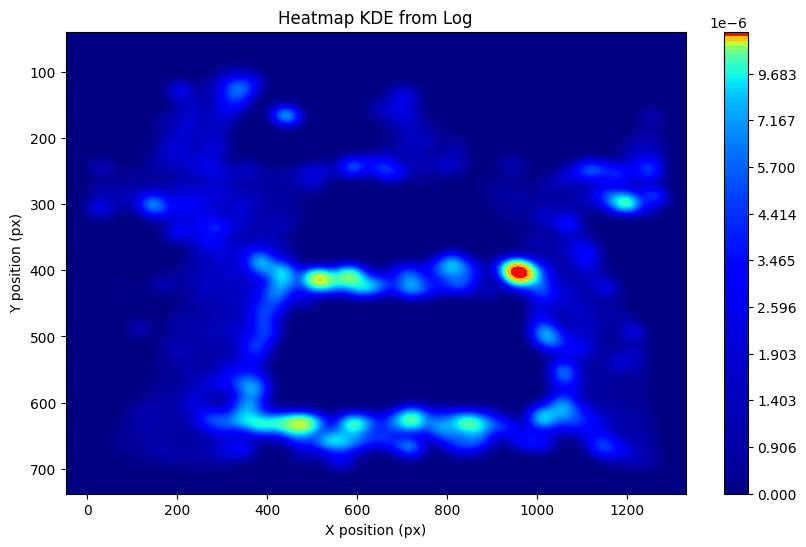

บันทึก heatmap_kde.png แล้ว


In [11]:
# ทำ KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=points[:, 0],
    y=points[:, 1],
    fill=True,
    cmap=cm.get_cmap("jet"),
    bw_adjust=0.5,
    levels=100,
    thresh=0,
    cbar=True  # ให้ seaborn สร้าง colorbar เอง
)
plt.gca().invert_yaxis()
plt.title("Heatmap KDE from Log")
plt.xlabel("X position (px)")
plt.ylabel("Y position (px)")
plt.savefig("heatmap_kde.png", dpi=300)
plt.show()

print("บันทึก heatmap_kde.png แล้ว")

In [ ]:
cap = cv2.videocaptue(r"Vid_test\front_room.mp4")
_,frame= cap.read() 